In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Importing necessary libraries.

In [13]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


Connecting to my Drive to fetch necessary files.

In [31]:
path = '/content/MyDrive/MyDrive/asu9999.fit'
file = fits.open(path)
file

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f19c539d990>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f19bf18a800>]

Importing file asu.fit for 9,999 data points.

In [27]:
file.info()

Filename: /content/MyDrive/MyDrive/asu9999.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   ()      
  1  I_239_hip_main    1 TableHDU        81   9999R x 17C   [F14.10, F14.10, I6, A11, A11, F5.2, F12.8, F12.8, F7.2, F8.2, F8.2, F6.2, F6.3, A1, F12.8, F12.8, I8]   


In [32]:
data = file[1].data
data

FITS_rec([(342.9906651204, -82.7019601968, 112911, '22 51 57.69', '-82 42 07.4', 8.39, 342.99036434, -82.70205494, 8.54, 15.72, 38.98, 0.7, 0.955, '', 342.99066512, -82.7019602, 112811),
          (342.9927234038, 53.7097816536, 112912, '22 51 58.26', '+53 42 35.3', 8.48, 342.99273675, 53.70979298, 0.53, -3.25, -4.66, 0.8, 0.022, '', 342.9927234, 53.70978165, 112812),
          (342.9986691313, -53.2453493207, 112913, '22 51 59.61', '-53 14 43.3', 9.82, 342.99837144, -53.24537246, 18.69, 73.29, 9.52, 1.57, 0.816, '', 342.99866913, -53.24534932, 112813),
          ...,
          (14.6906099722, -5.8828162215, 4592, '00 58 45.74', '-05 52 57.4', 6.57, 14.69060186, -5.88261835, 11.03, 3.32, -81.41, 0.79, 1.136, '', 14.69060997, -5.88281622, 4589),
          (14.6913065922, 32.1056619528, 4593, '00 58 45.85', '+32 06 20.3', 10.64, 14.69104459, 32.10564421, 3.64, 91.31, 7.3, 1.92, 0.0, '', 14.69130659, 32.10566195, 4590),
          (14.7041494749, -13.6609160328, 4594, '00 58 49.01', '-13 3

In [35]:
data = np.array(data)

Notice that PrimaryHDU at 0 index is empty. We extract data from I_239_hip_main at 1 index.

In [36]:
X = []
count = 0
for x in data:
  x = np.array(x)
  X.append(x)
  count += 1
  if count%3333 ==0:
    print("Batch {} done.".format(count/3333))
X = np.array(X)
X

Batch 1.0 done.
Batch 2.0 done.
Batch 3.0 done.


array([(b'342.9906651204', b'-82.7019601968', b'112911', b'22 51 57.69', b'-82 42 07.4', b' 8.39', b'342.99036434', b'-82.70205494', b'   8.54', b'   15.72', b'   38.98', b'  0.70', b' 0.955', b' ', b'342.99066512', b'-82.70196020', b'  112811\r'),
       (b'342.9927234038', b'+53.7097816536', b'112912', b'22 51 58.26', b'+53 42 35.3', b' 8.48', b'342.99273675', b'+53.70979298', b'   0.53', b'   -3.25', b'   -4.66', b'  0.80', b' 0.022', b' ', b'342.99272340', b'+53.70978165', b'  112812\r'),
       (b'342.9986691313', b'-53.2453493207', b'112913', b'22 51 59.61', b'-53 14 43.3', b' 9.82', b'342.99837144', b'-53.24537246', b'  18.69', b'   73.29', b'    9.52', b'  1.57', b' 0.816', b' ', b'342.99866913', b'-53.24534932', b'  112813\r'),
       ...,
       (b'014.6906099722', b'-05.8828162215', b'  4592', b'00 58 45.74', b'-05 52 57.4', b' 6.57', b'014.69060186', b'-05.88261835', b'  11.03', b'    3.32', b'  -81.41', b'  0.79', b' 1.136', b' ', b'014.69060997', b'-05.88281622', b'    45

Unparsing record data and storing in np.recarray() {record array}

In [22]:
#len(X[5030]['B-V'].decode('UTF-8'))

In [37]:
Vmag = []
for x in range(len(X)):
  v = X[x]['Vmag'].decode('UTF-8')
  if(v == "     "):
    v = lambda v : 0 if(v == "     ") else 0
  else:
    v = float(v)
    Vmag.append(v)
Vmag = np.array(Vmag)
Vmag

array([ 8.39,  8.48,  9.82, ...,  6.57, 10.64,  8.94])

Making array for Vmag data

In [38]:
logL = []
count = 0
for x in range(len(X)):
  v = X[x]['Vmag'].decode('UTF-8')
  p = X[x]['Plx'].decode('UTF-8')
  # count += 1
  # print(count)
  if(v == "     " or p == "       "):
    v = lambda v : 0 if(v == "     ") else 0
    p = lambda p : 1 if(p == "       ") else 1
  else:
    v = float(v)
    p = float(p)
    z = (15 - v - 5*np.log10(p))/2.5
    logL.append(z)
logL = np.array(logL)
logL

<ipython-input-38-2151112cacd5>:14: RuntimeWarning: invalid value encountered in log10
  z = (15 - v - 5*np.log10(p))/2.5
<ipython-input-38-2151112cacd5>:14: RuntimeWarning: divide by zero encountered in log10
  z = (15 - v - 5*np.log10(p))/2.5


array([ 0.78108426,  3.15944826, -0.4712186 , ...,  1.28684898,
        0.62179723,  0.87205134])

Making log(Luminosity) from Vmag and Plx_mag data.
$log_{10}{L} = (15 - V_{mag} - 5*log_{10}{(Plx_{mag})}) / 2.5$

In [40]:
BV = []
for x in range(len(X)):
  b = X[x]['B-V'].decode('UTF-8')
  if b == "      ":
    b = 0
  else:
    b = float(b)
  BV.append(b)
BV = np.array(BV)
BV

array([0.955, 0.022, 0.816, ..., 1.136, 0.   , 0.409])

Making B-V color index.

In [41]:
len(logL)

9988

In [42]:
len(Vmag)

9999

In [43]:
plt.rcParams['figure.figsize'] = [12, 5]

Resizing the plots.

Text(0, 0.5, 'logL')

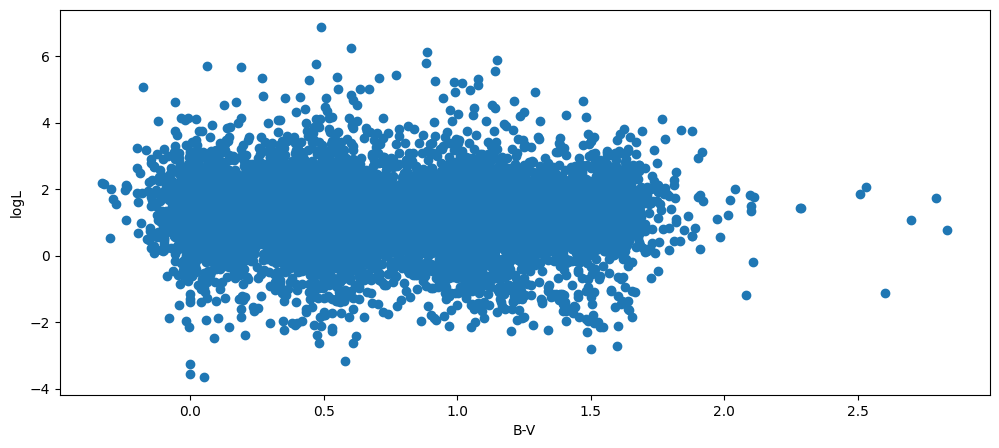

In [45]:
plt.scatter(BV[:9988], logL)
plt.xlabel("B-V")
plt.ylabel("logL")

Plotting HR diagram for B-V vs logL

Text(0, 0.5, 'B-V')

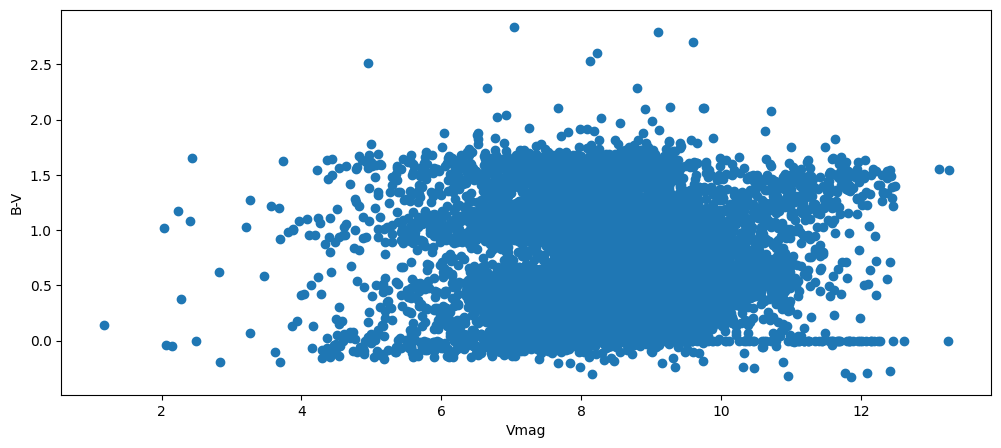

In [48]:
plt.scatter(Vmag, BV[:9999])
plt.xlabel("Vmag")
plt.ylabel("B-V")

Plotting HR diagram for Vmag vs B-V